In [3]:
# Run this cell every time you open it up
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set_palette("Set2")

df = pd.read_csv("results.csv")
df['iterations'] = df['iterations'].div(1000)
df['latency per request'] = (df['latency']*1000)/df['iterations']
df.head()

,run#,latency,approach,iterations,latency per request
0,0,0.012111,linux_independent,10.0,1.2111
1,0,0.012873,linux_server_client,10.0,1.2873
2,1,0.040751,linux_independent,10.0,4.0751
3,1,0.012813,linux_server_client,10.0,1.2813
4,2,0.038307,linux_independent,10.0,3.8307


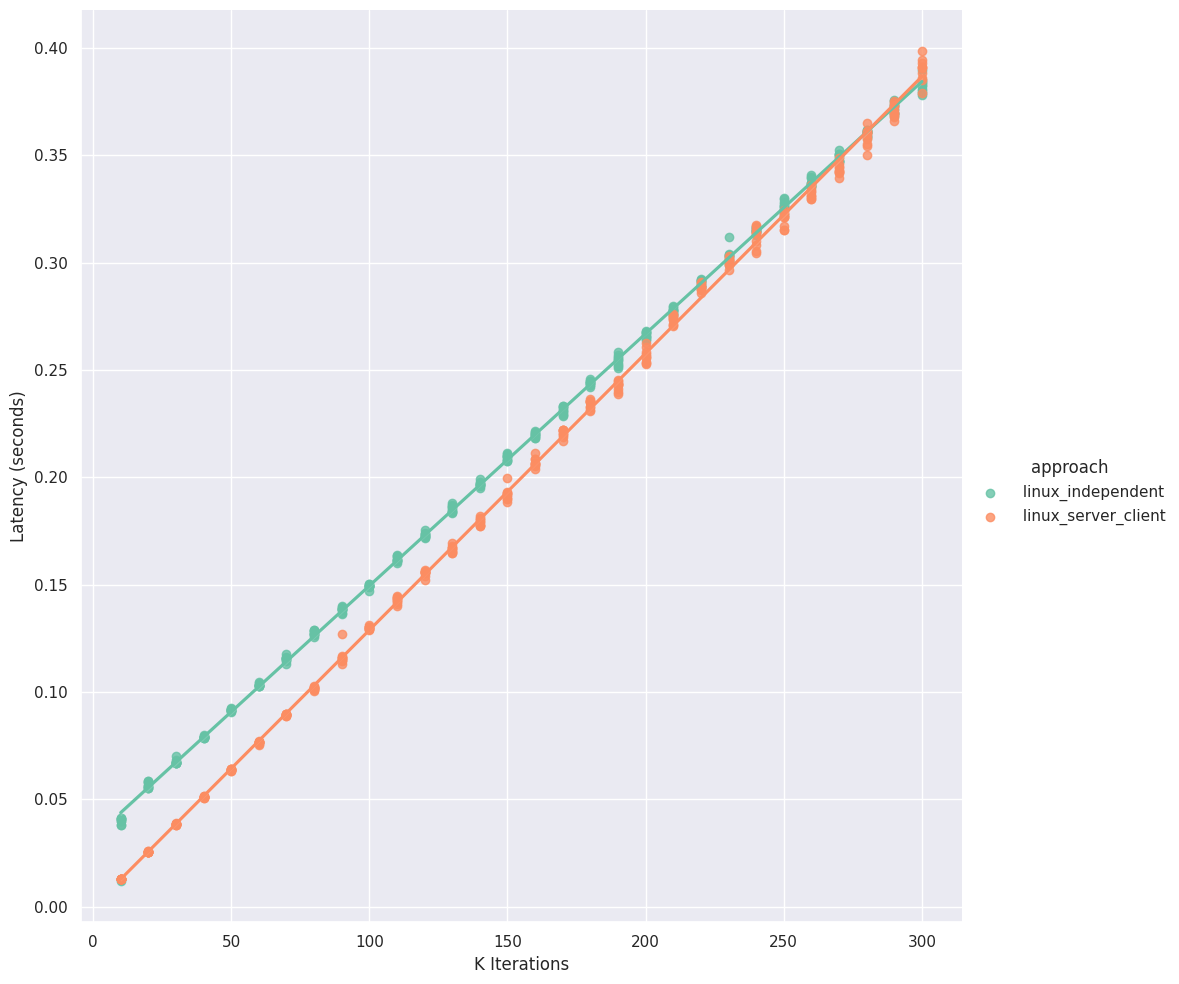

In [4]:
# Visualization for sweep of writes vs latency

p1=sns.lmplot(data=df, x="iterations", y="latency", hue="approach",  height=10)
p1.set_axis_labels("K Iterations", "Latency (seconds)")

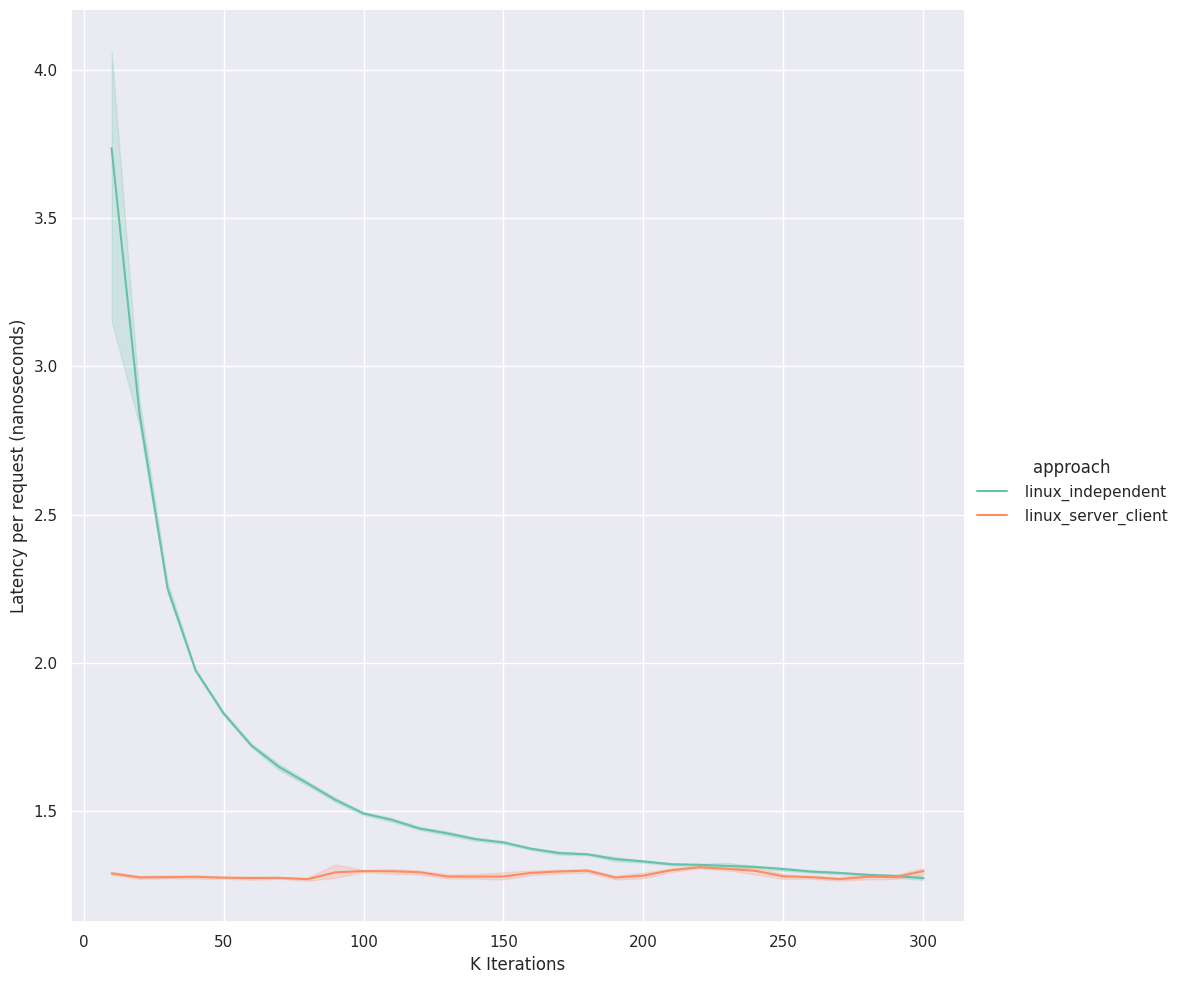

In [5]:
# Visualization for sweep of writes vs latency

p2=sns.relplot(data=df, x="iterations", y="latency per request", hue="approach", kind="line",  height=10)
p2.set_axis_labels("K Iterations", "Latency per request (nanoseconds)")

<AxesSubplot: xlabel='run#', ylabel='latency per request'>

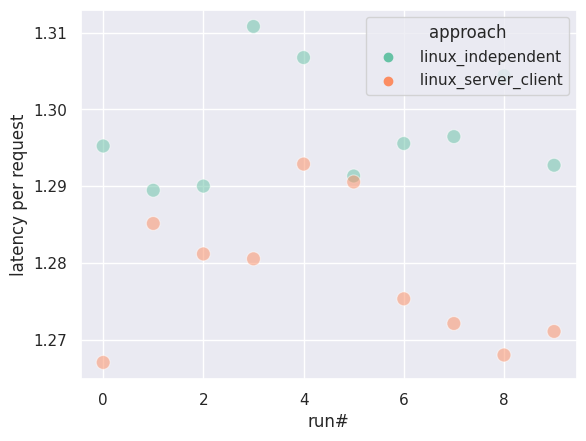

In [6]:
# Visualization for given writes vs latency
iteration = 260 # number of K iterations

df_iteration = df[df['iterations']==iteration]
sns.scatterplot(data=df_iteration, x="run#", y="latency per request", hue="approach", alpha=0.5, s=100)